In [65]:
# ANN - artificial neural network
# simplest deep learning model

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense

###### we are going to use diabetes datasets from the standard UCI machine learning repository.
###### the dataset contains the information : 
        Input Variables (X):

            Number of times pregnant
            Plasma glucose concentration at 2 hours in an oral glucose tolerance test
            Diastolic blood pressure (mm Hg)
            Triceps skin fold thickness (mm)
            2-hour serum insulin (mu U/ml)
            Body mass index (weight in kg/(height in m)^2)
            Diabetes pedigree function
            Age (years)

        Output Variables (y):

            Class variable (0 or 1)

In [67]:
# loading the dataset
data = np.loadtxt("./diabetes.csv", delimiter=',')
data.shape

(768, 9)

In [68]:
x = data[:, :-1]
y = data[:, -1]
x.shape, y.shape

((768, 8), (768,))

In [69]:
# we will only perform basic data analysis as it's not the scope of this notebook
np.isnan(x).sum()

0

In [70]:
# splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [71]:
# standard scaler
scaler =  StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [72]:
# defining ANN model : 
    # in keras, models are defined as sequence of layers. so, first we have to define a instance of the sequential model.
    # then we can add layers as we wish. these are called hidden layers. if layers are very low, then it will be difficult for the model to learn, if loo large layers, model is prone to overfitting. then how can we decide the right number of layers? we will discuss it later.
    # then we have output layer
# depth = number of layers in neural network

In [73]:
xtrain.shape[1]

8

In [85]:
model = Sequential() #creating a sequential model instance

model.add(Dense(12, input_shape=(8,), activation='relu')) 
# Dense() is used to create a fully connected layer.
# the first parameter in Dense() is unit i.e., number of nodes in the 1st layer
# second parameter in Dense() is 'input_shape' parameter where we pass number of features, batch size in a tuple like this (number_of_features, batch_size) but we can also exclude the batch_size and just put a place holder like this : (number_of_features, ).  
# then we mention activation function for that layer. we have specified relu(redtified linear unit)

model.add(Dense(8, activation= 'relu')) #second layer of the mode where units = 8
model.add(Dense(1, activation='sigmoid')) #output layer. we have only 1 node in the activation layer as we want only 1 output. activation function is 'sigmoid' as we want the output between 0 and 1 where 0 is false and 1 is true.

In [86]:
model.summary() # summary() returns the summary of the model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                108       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # after specifying the layers, we need to compile the model where we specify 'optimizer', 'loss' and 'metrics' parameters

In [88]:
history = model.fit(xtrain, ytrain, batch_size=10, epochs=150, validation_data=(xtest, ytest), verbose=0) # training the model using the train dataset. 
# 'epochs' parameter specifies number of times the entire dataset will be passed through the model.
# 'batch_size' parameter specifies number of batches the dataset will be divided into during each epoch. for example, if the batch_size is 10, then the dataset will be divided into 10 batches in 1 epoch.

In [89]:
ypred = model.predict(xtest) #predicting 

5/5 [==============================] - 1s 9ms/step


In [ ]:
# to get the accuracy:
loss, accuracy = model.evaluate(xtest, ytest)
print(f"accuracy = {accuracy}, loss = {loss}")

5/5 [==============================] - 0s 14ms/step - loss: 0.5242 - accuracy: 0.7532
accuracy = 0.7532467246055603, loss = 0.524193286895752


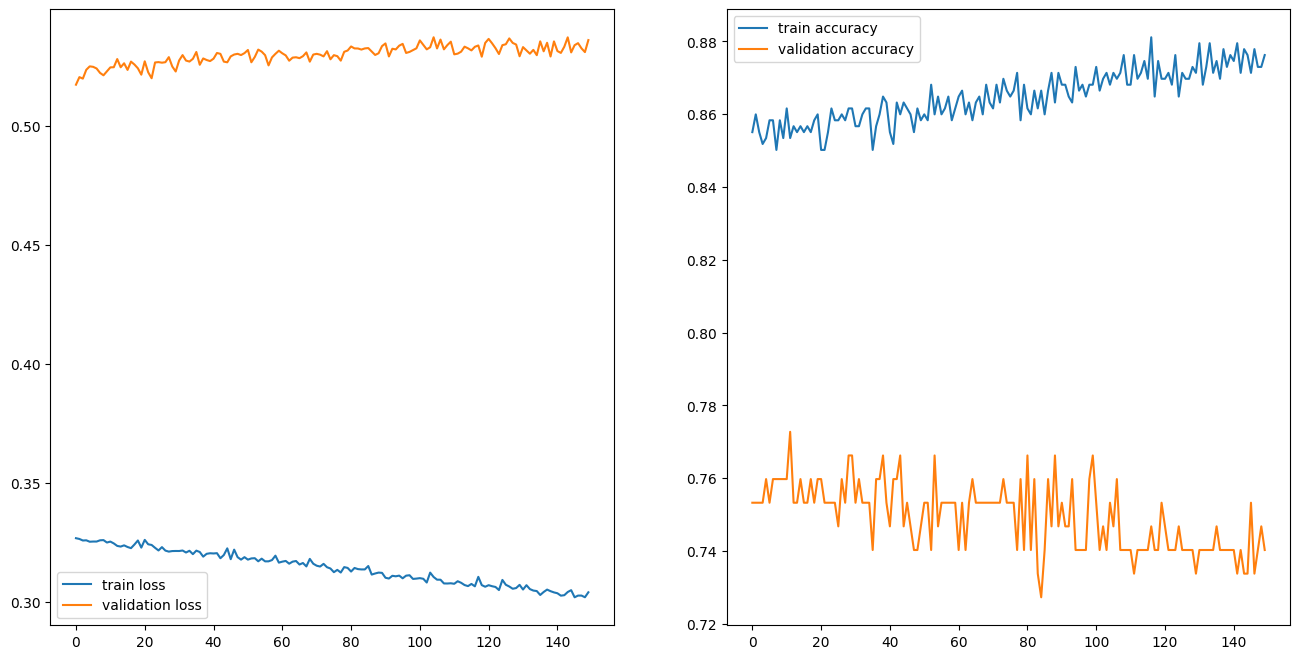

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label = 'train loss')
ax[0].plot(history.history['val_loss'], label = 'validation loss')

ax[1].plot(history.history['accuracy'], label = 'train accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'validation accuracy')

ax[0].legend()
ax[1].legend()
plt.show()